# Video Game Sales

### Подключение библиотек

In [24]:
import numpy as np
import pandas as pd

In [25]:
import seaborn as sns

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

### Загрузка данных

In [27]:
vgs = pd.read_csv("vgsales.csv")

In [28]:
vgs.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


#### Описание данных

Этот набор данных содержит список видеоигр, продажи которых превысили 100 000 копий.

Name - Название игры

Platform - Платформа выпуска игр (например, PC, PS4 и т.д.)

Year - Год выпуска игры

Genre - Жанр игры

Publisher - Издатель игры

NA_Sales - Продажи в Северной Америке (в миллионах)

EU_Sales - Продажи в Европе (в миллионах)

JP_Sales - Продажи в Японии (в миллионах)

Other_Sales - Продажи в остальном мире (в миллионах)

Global_Sales - Общий объем продаж по всему миру.


##### Выведите размерность и краткую информацию о наборе данных

In [29]:
vgs.shape

(16598, 11)

In [30]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


##### Выведите краткую статистическую информацию по набору данных

In [31]:
vgs.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [32]:
vgs[['Name', 'Platform', 'Genre', 'Publisher']].describe()

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


##### Проверьте набор данных на наличие пропущенных и дублирующих значений

In [33]:
vgs.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [34]:
print(vgs.duplicated().sum())

0


#### Напишите краткий вывод о наборе данных

### Заполнение пустых записей

Удалите пропущенные значения по признаку Publisher, а по признаку Year - замените на среднее значение. Значения по полю Year преобразуйте в целый тип. Удалите признак Rank. После преобразований, убедитесь, что изменения сохранились в наборе данных.

In [35]:
vgs = vgs[vgs['Publisher'].notna()]
vgs

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [36]:
mean_year = vgs['Year'].mean()
vgs['Year'].fillna(mean_year)

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16540, dtype: float64

In [37]:
vgs['Year'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [38]:
vgs.drop('Rank', axis=1)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [39]:
vgs.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [40]:
vgs.isnull().sum()

Rank              0
Name              0
Platform          0
Year            249
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [41]:
vgs.shape

(16540, 11)

In [42]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  object 
 2   Platform      16540 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16540 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Анализ продаж видеоигр

#### 1. В каком году было выпущено больше всего игр? Выведите первые 10 записей.

In [43]:
vgs['Year'].value_counts().head(10)

Year
2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
Name: count, dtype: int64

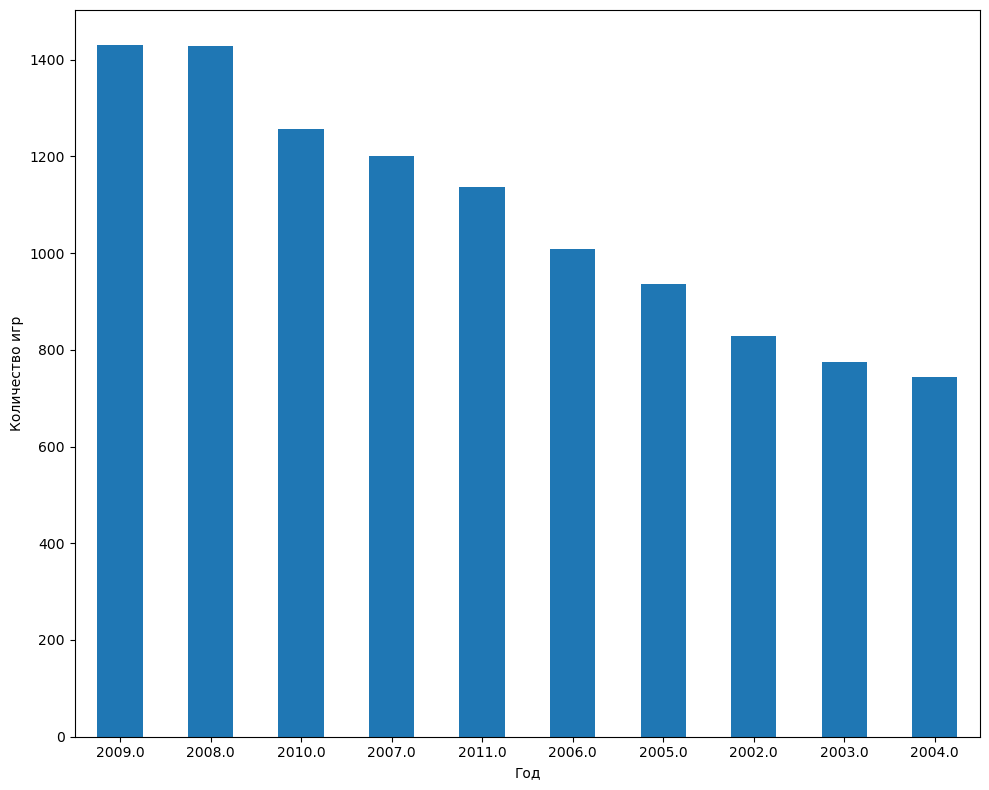

In [44]:
plt.figure(figsize=(10, 8))
games_per_year = vgs['Year'].value_counts().head(10)
games_per_year.head(10).plot(kind='bar')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [45]:
print(f"Количество уникальных значений в Platform: {vgs['Platform'].nunique()}")
print(f"Количество уникальных значений в Genre: {vgs['Genre'].nunique()}")
print(f"Количество уникальных значений в Publisher: {vgs['Publisher'].nunique()}")

Количество уникальных значений в Platform: 31
Количество уникальных значений в Genre: 12
Количество уникальных значений в Publisher: 578


In [ ]:
# Scatterplot


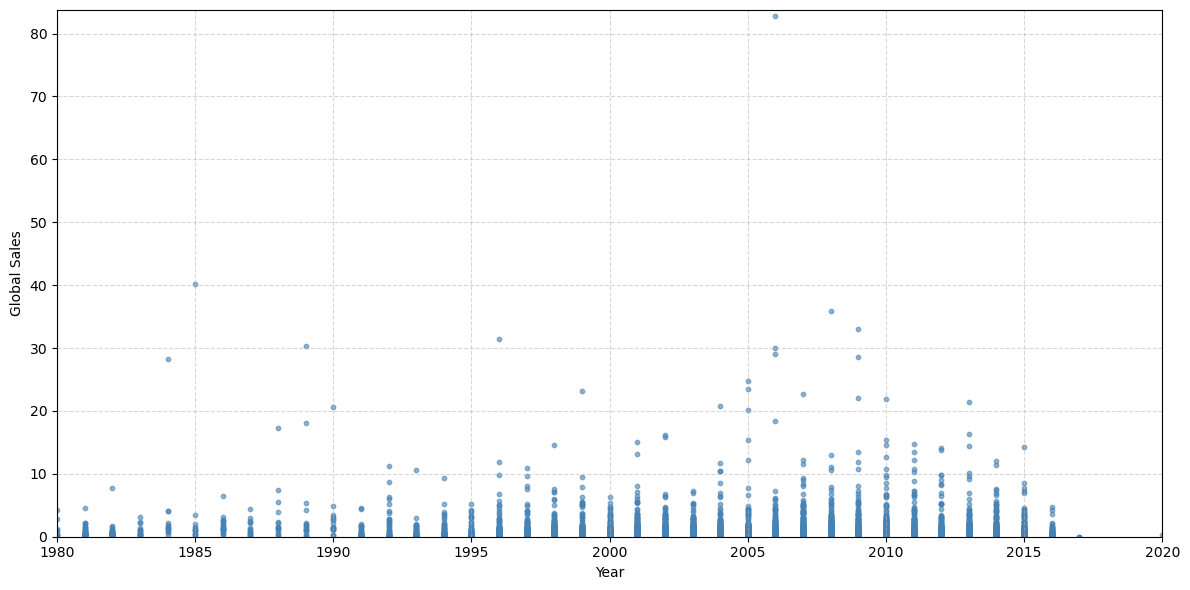

In [46]:
df = pd.read_csv('vgsales.csv')
df = df.dropna(subset=['Year'])
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Global_Sales'], alpha=0.6, s=10, color='steelblue')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.xlim(1980, 2020)
plt.ylim(0, df['Global_Sales'].max() + 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2. Получите среднюю стоимость продаж в Европе 

In [47]:
sum(vgs['EU_Sales']) / len(vgs['EU_Sales'])

0.14688331318016928

#### 3. Получите максимальную стоимость продаж в Японии и вывведите полную информацию об игре с максимальной суммой продаж

In [48]:
max(vgs['JP_Sales'])

10.22

In [49]:
vgs.iloc[[vgs['JP_Sales'].idxmax()]]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


##### Выведите первые 10 записей с максимальными суммами продажам в Японии по годам

In [50]:
jp_sales_by_year = vgs.groupby('Year')['JP_Sales'].sum().sort_values(ascending=False).head(10)
print(jp_sales_by_year)

Year
2006.0    73.73
2009.0    61.89
2007.0    60.29
2008.0    60.26
2010.0    59.49
1996.0    57.44
2005.0    54.28
2011.0    53.04
1999.0    52.34
2012.0    51.74
Name: JP_Sales, dtype: float64


C:\Users\Muham\AppData\Local\Temp\ipykernel_30900\184146120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vgs['Year'] = pd.to_numeric(vgs['Year'], errors='coerce')


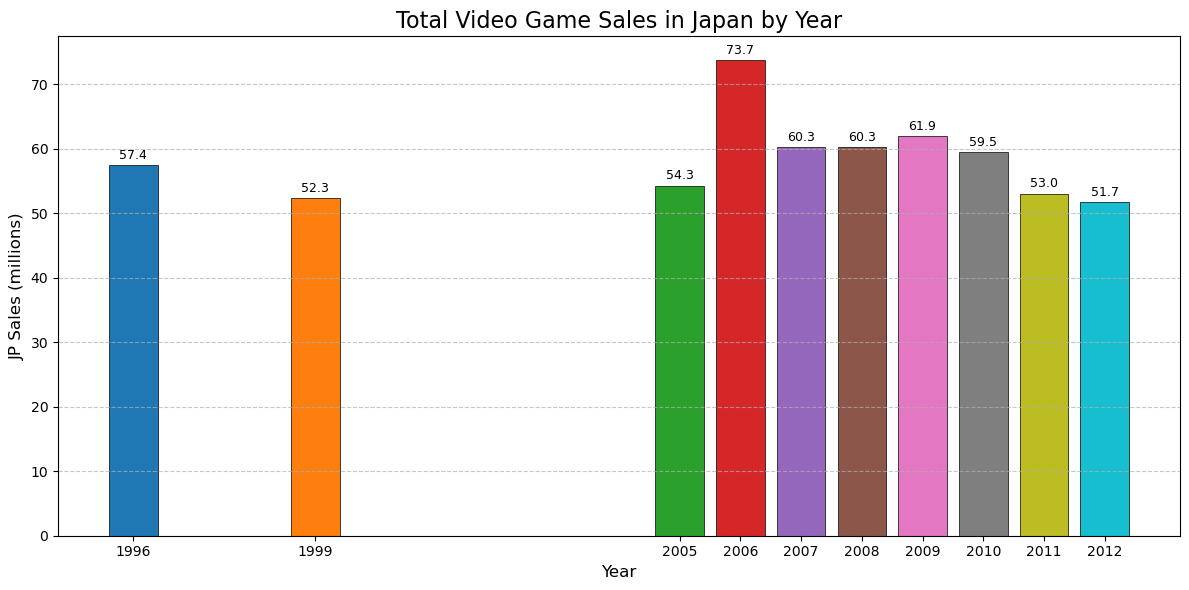

In [51]:

vgs = vgs.dropna(subset=['Year'])
vgs['Year'] = pd.to_numeric(vgs['Year'], errors='coerce')
vgs = vgs.dropna(subset=['Year'])
vgs['Year'] = vgs['Year'].astype(int)
target_years = [1996, 1999, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
df_filtered = df[df['Year'].isin(target_years)]
sales_by_year = df_filtered.groupby('Year')['JP_Sales'].sum()
sales_by_year = sales_by_year.sort_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(sales_by_year.index, sales_by_year.values, 
               color=plt.cm.tab10.colors,
               edgecolor='black', linewidth=0.5)
plt.title('Total Video Game Sales in Japan by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('JP Sales (millions)', fontsize=12)
plt.xticks(sales_by_year.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

#### 4. К какому жанру относится видеоигра "Brain Age 2: More Training in Minutes a Day" video game?

In [52]:
vgs[vgs['Name'] == 'Brain Age 2: More Training in Minutes a Day']['Genre']

27    Puzzle
Name: Genre, dtype: object

#### 5.  Каков объём продаж видеоигры «Grand Theft Auto: Vice City» по всему миру?

In [53]:
vgs[vgs['Name'] == 'Grand Theft Auto: Vice City']['Global_Sales']

24       16.15
13732     0.04
Name: Global_Sales, dtype: float64

In [54]:
vgs[vgs['Name'] == 'Grand Theft Auto: Vice City']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
24,25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
13732,13734,Grand Theft Auto: Vice City,PC,2003,Action,Take-Two Interactive,0.00,0.03,0.00,0.01,0.04


#### 6. Выведите название видеоигры, которая имеет самые высокие продажи в Северной Америке.

0    Wii Sports
Name: Name, dtype: object

In [64]:
vgs[vgs['NA_Sales'] == vgs['NA_Sales'].max()]['Name']

0    Wii Sports
Name: Name, dtype: object

#### 7. Выведите видеоигры с самыми низкими продажами в мире

,Name,Global_Sales
15980,Turok,0.01
15981,Coven and Labyrinth of Refrain,0.01
15982,Super Battle For Money Sentouchuu: Kyuukyoku n...,0.01
15983,Dragon Zakura DS,0.01
15984,Chameleon: To Dye For!,0.01
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01
16594,Men in Black II: Alien Escape,0.01
16595,SCORE International Baja 1000: The Official Game,0.01
16596,Know How 2,0.01


In [65]:
vgs[vgs['Global_Sales'] == vgs['Global_Sales'].min()][['Name', 'Global_Sales']]

,Name,Global_Sales
15980,Turok,0.01
15981,Coven and Labyrinth of Refrain,0.01
15982,Super Battle For Money Sentouchuu: Kyuukyoku n...,0.01
15983,Dragon Zakura DS,0.01
15984,Chameleon: To Dye For!,0.01
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01
16594,Men in Black II: Alien Escape,0.01
16595,SCORE International Baja 1000: The Official Game,0.01
16596,Know How 2,0.01


#### 8. Игр какого жанра было создано больше всего?

12

In [66]:
vgs['Genre'].nunique()

12

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [67]:
vgs['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Genre
Action          3309
Sports          2343
Misc            1712
Role-Playing    1486
Shooter         1308
Adventure       1282
Racing          1248
Platform         884
Simulation       863
Fighting         846
Strategy         678
Puzzle           581
Name: count, dtype: int64

In [70]:
vgs['Genre'].value_counts()

Genre
Action          3309
Sports          2343
Misc            1712
Role-Playing    1486
Shooter         1308
Adventure       1282
Racing          1248
Platform         884
Simulation       863
Fighting         846
Strategy         678
Puzzle           581
Name: count, dtype: int64

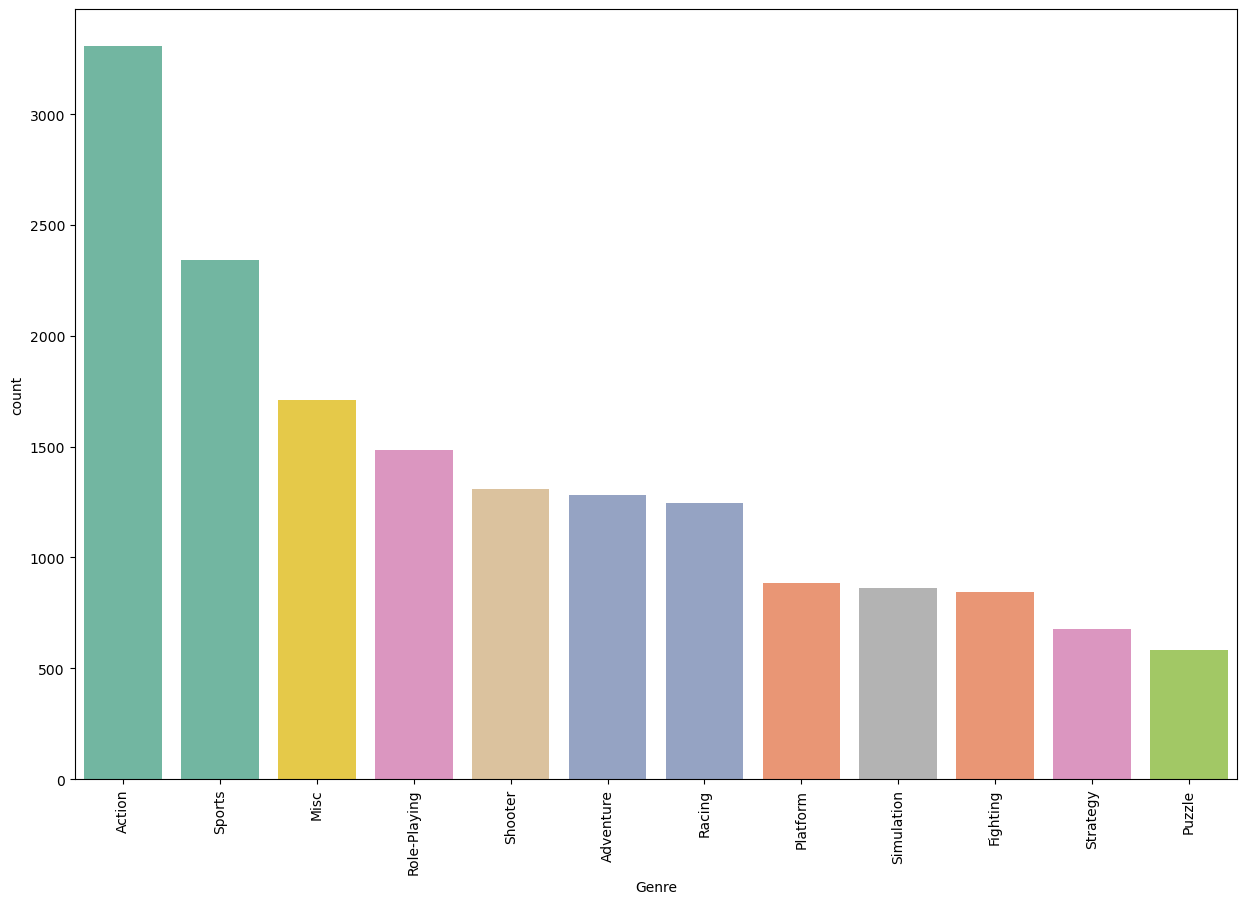

C:\Users\Muham\AppData\Local\Temp\ipykernel_67540\1676405557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette=colors)


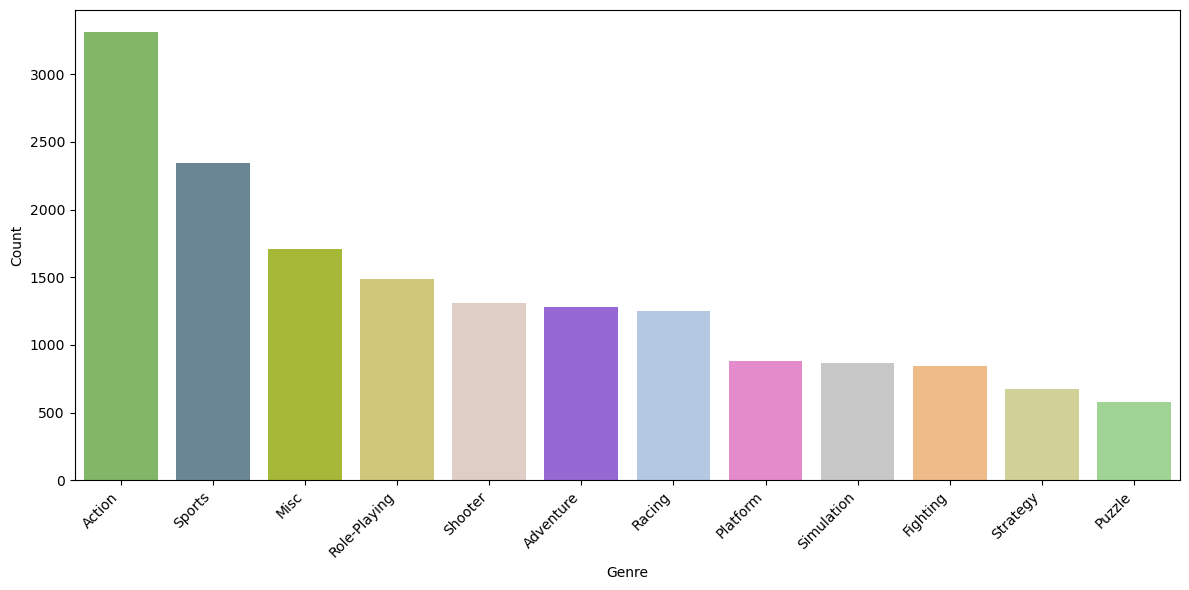

In [83]:
genre_counts = vgs['Genre'].value_counts()
plt.figure(figsize=(12,6))
colors = ['#7fc45b', '#63879b', '#b6cd22', '#ddd16b', '#e3ccc2', '#9456e5', '#aec7e8', '#f27cd2', '#c7c7c7', '#ffbb78', '#dbdb8d', '#98df8a']
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette=colors)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 9. Лучшие игры за 5 лет выпуска по жанрам

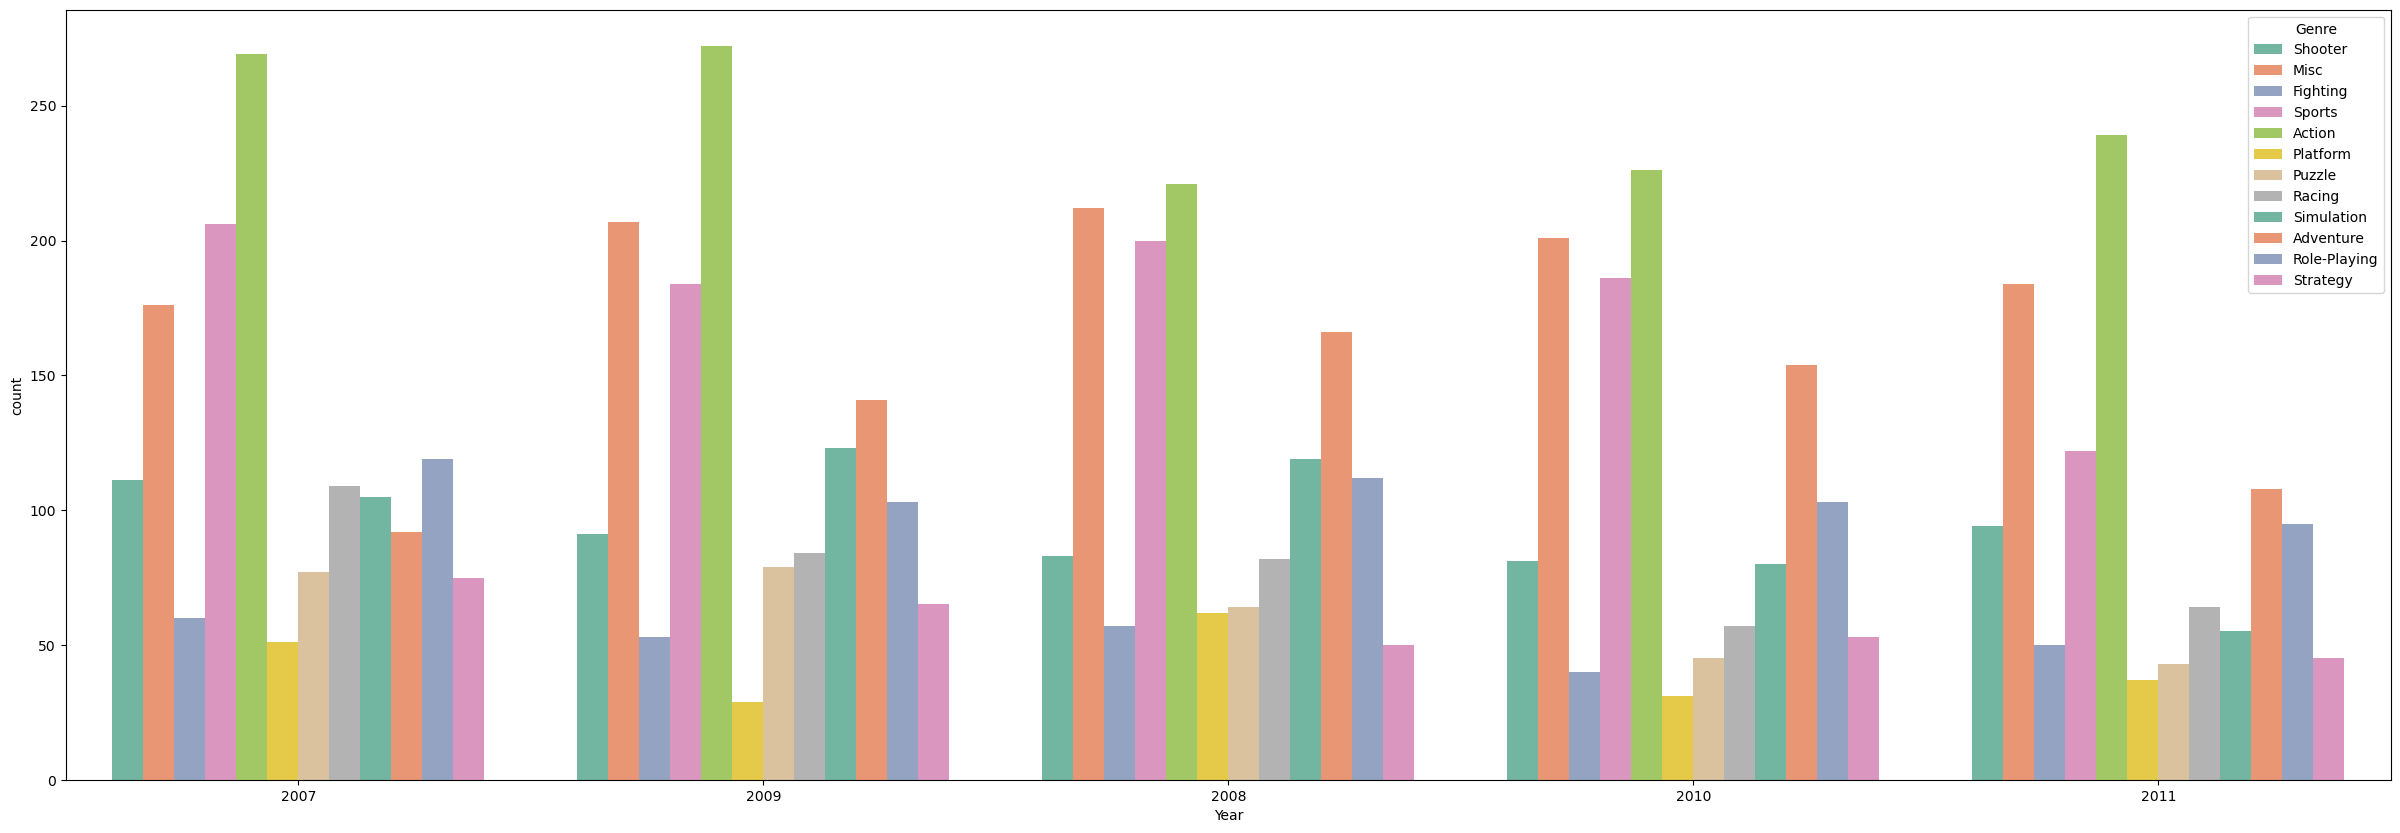

C:\Users\Muham\AppData\Local\Temp\ipykernel_67540\2461073127.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_games = vgs_last_five.groupby(['Year', 'Genre']).apply(lambda x: x.nlargest(1, 'Global_Sales')).reset_index(drop=True)


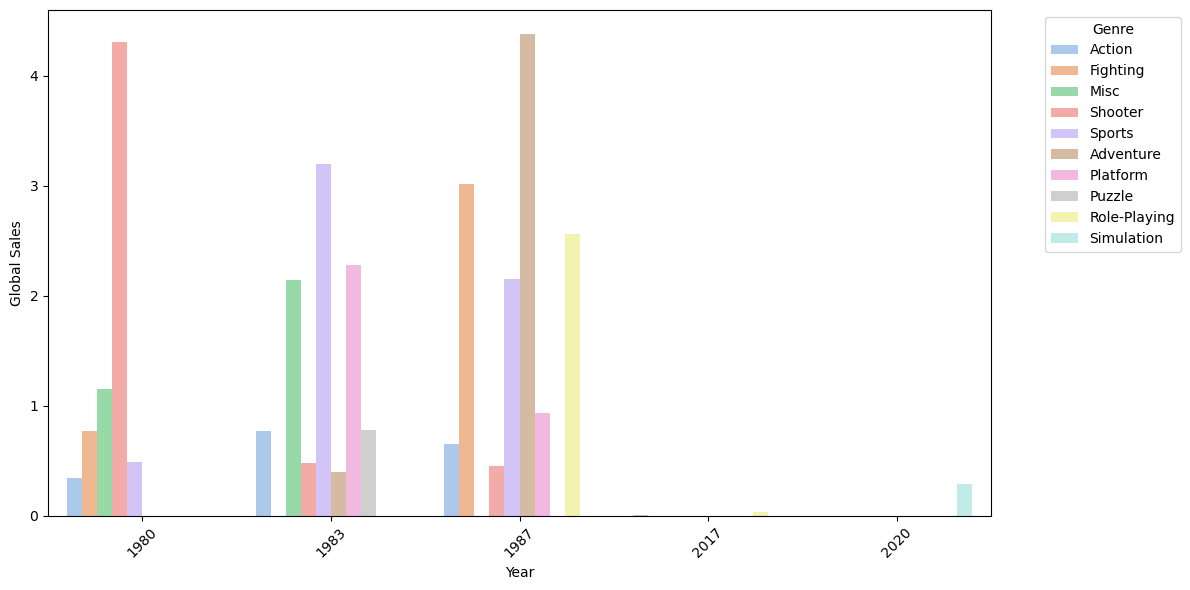

In [84]:
last_five_years = vgs['Year'].unique()[-5:]
vgs_last_five = vgs[vgs['Year'].isin(last_five_years)]
best_games = vgs_last_five.groupby(['Year', 'Genre']).apply(lambda x: x.nlargest(1, 'Global_Sales')).reset_index(drop=True)
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Global_Sales', hue='Genre', data=best_games, palette='pastel')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 10.  В каком году были самые высокие продажи по всему миру?¶

In [86]:
data_year = vgs.groupby('Year')['Global_Sales'].sum()
data_year.nlargest(1)

Year
2008    678.9
Name: Global_Sales, dtype: float64

In [87]:
data_year.head(10)

Year
1980    11.38
1981    35.77
1982    28.86
1983    16.79
1984    50.36
1985    53.94
1986    37.07
1987    21.74
1988    47.22
1989    73.45
Name: Global_Sales, dtype: float64

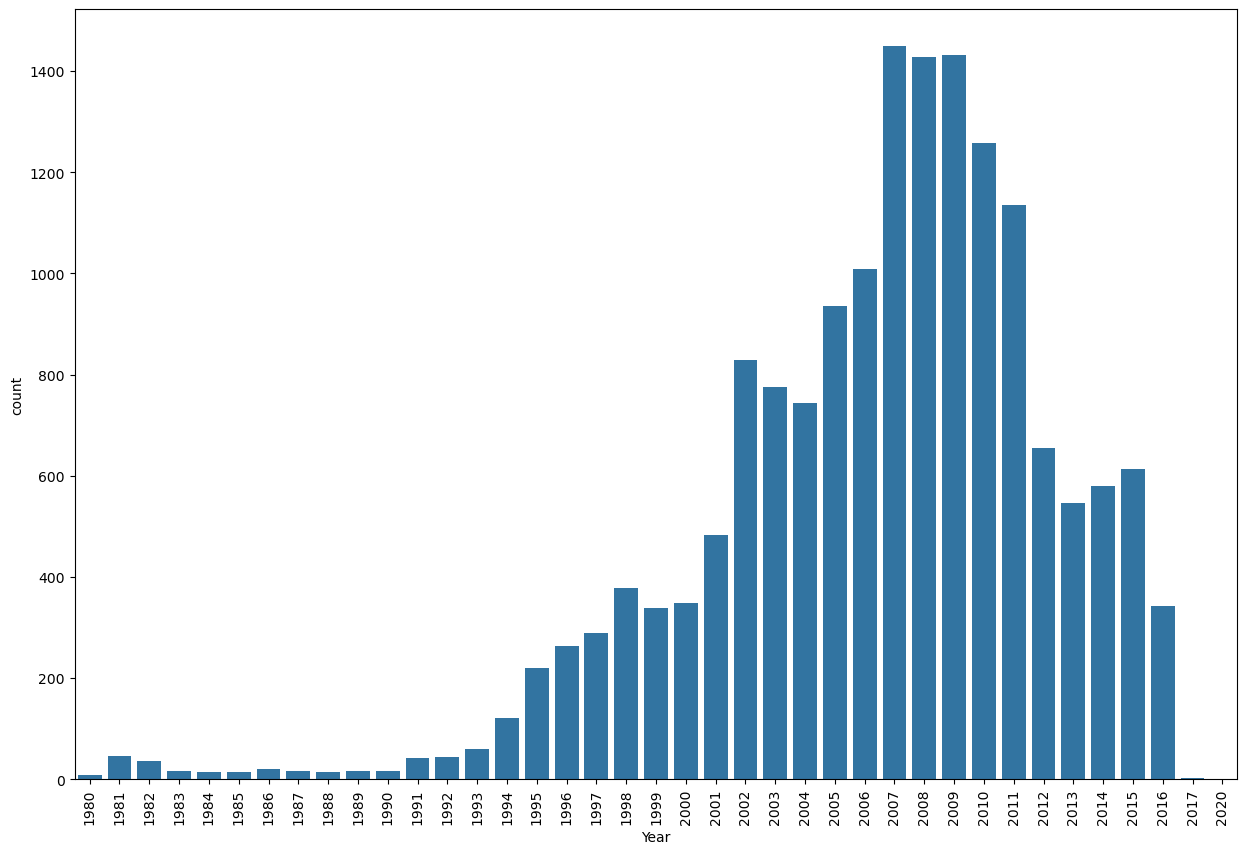

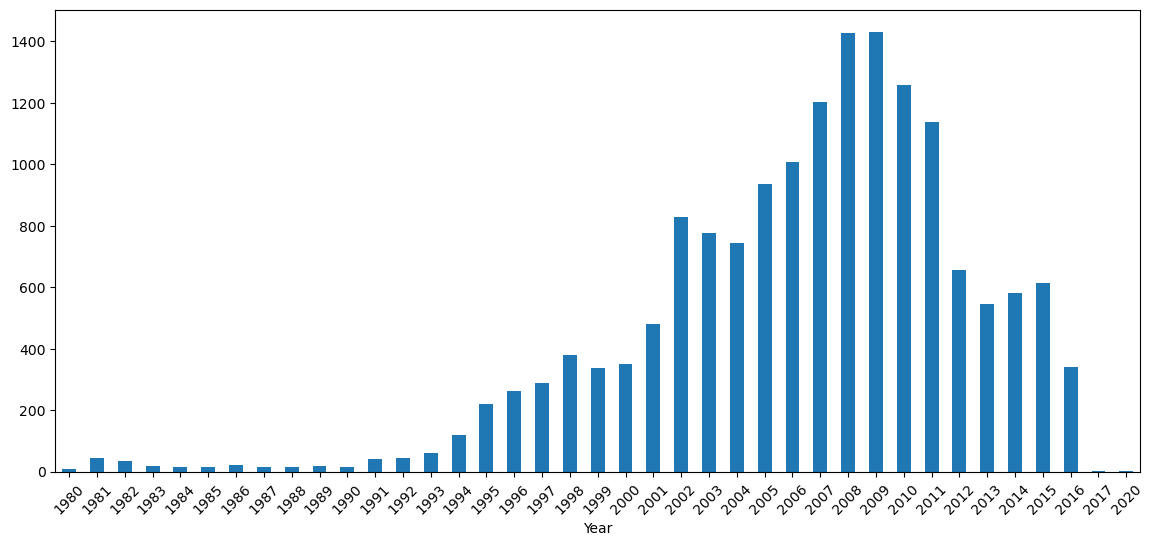

In [62]:
vgs['Year'].value_counts().sort_index().plot(kind='bar', figsize=(14, 6))
plt.xticks(rotation=45)
plt.show()

#### 11. Игры какого жанра имеют самую высокую цену продажи в мире

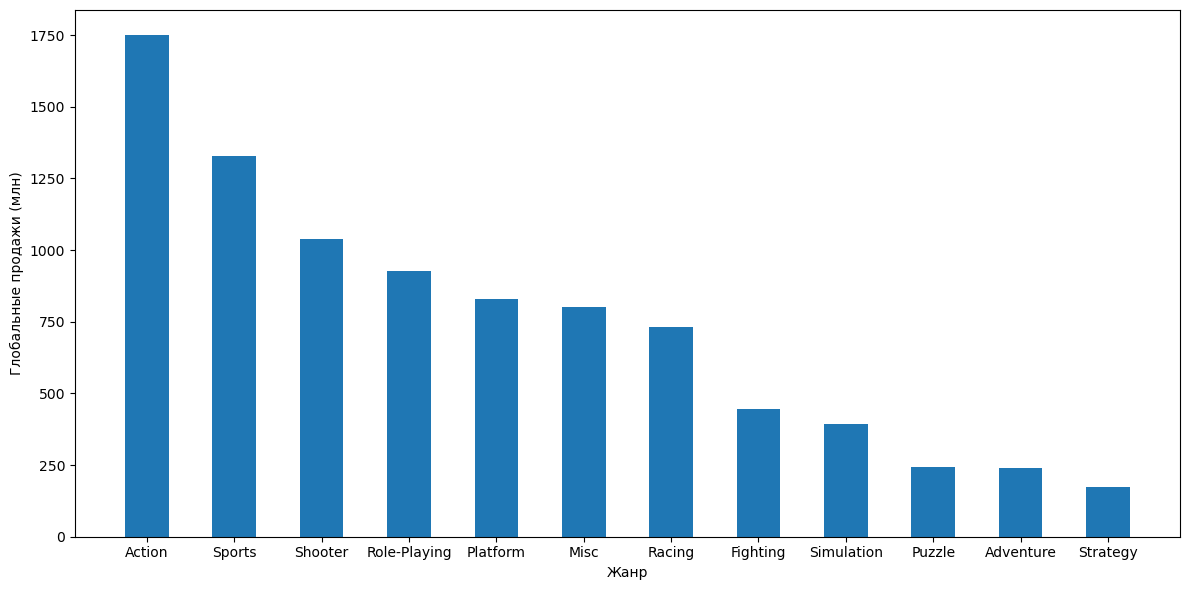

In [90]:
genre_sales = vgs.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(genre_sales.index, genre_sales.values, align='center', width=0.5)
plt.xticks(rotation=0)
plt.ylabel('Глобальные продажи (млн)')
plt.xlabel('Жанр')
plt.tight_layout()
plt.show()

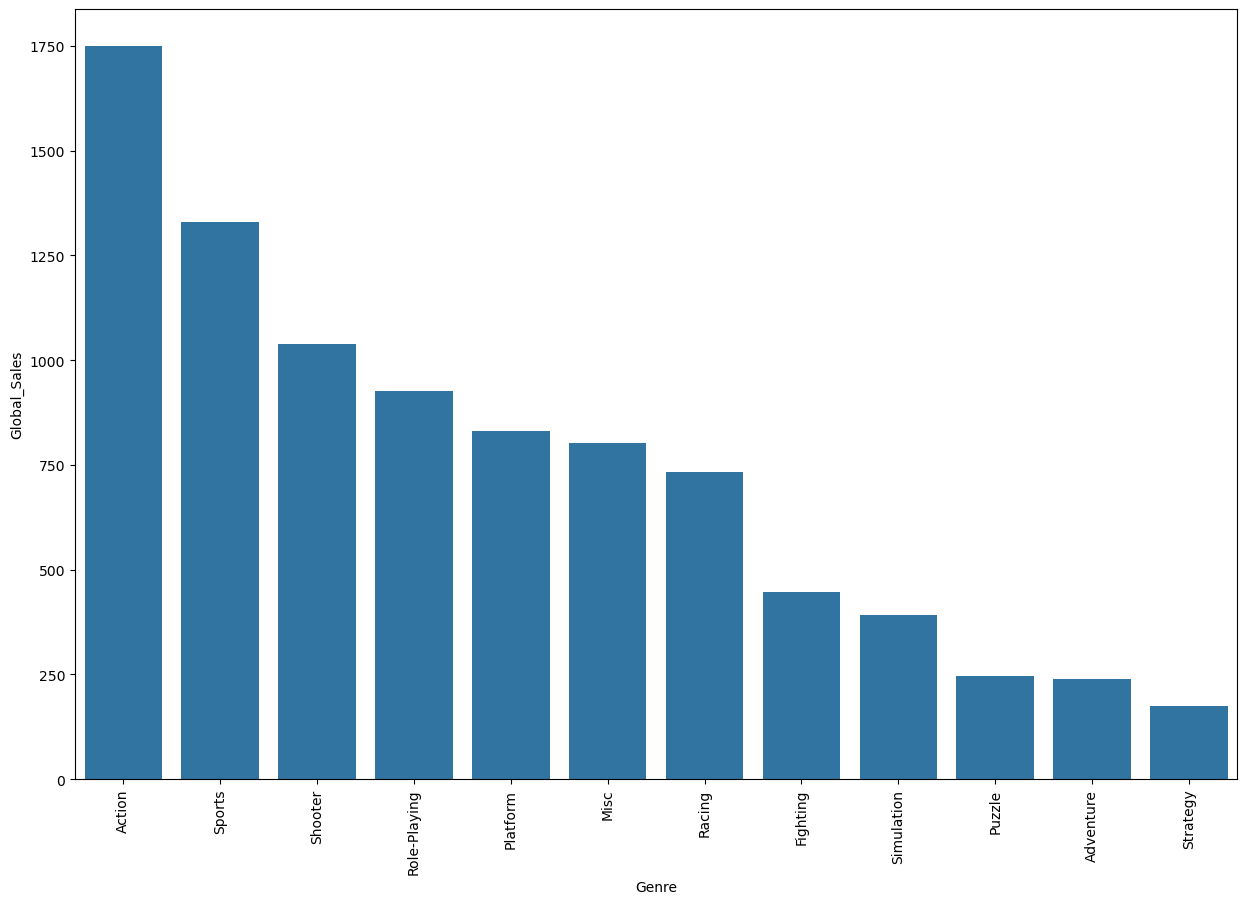

#### 12. На какой платформе самая высокая цена продажи в мире?

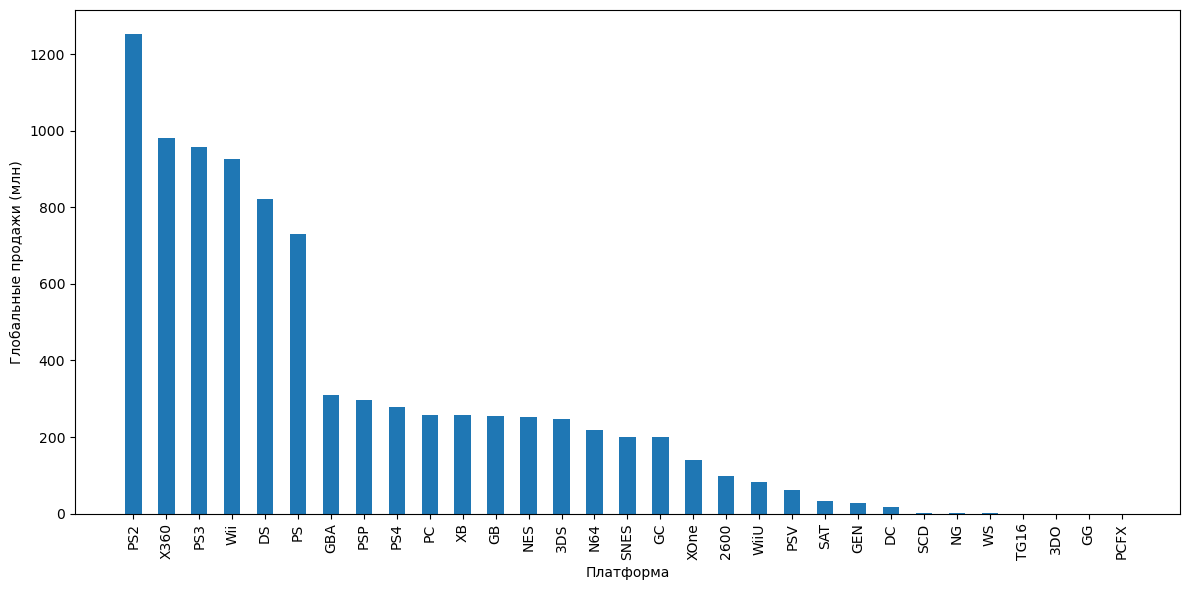

In [94]:
platform_sales = vgs.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(platform_sales.index, platform_sales.values, align='center', width=0.5)
plt.xticks(rotation=90)
plt.ylabel('Глобальные продажи (млн)')
plt.xlabel('Платформа')
plt.tight_layout()
plt.show()

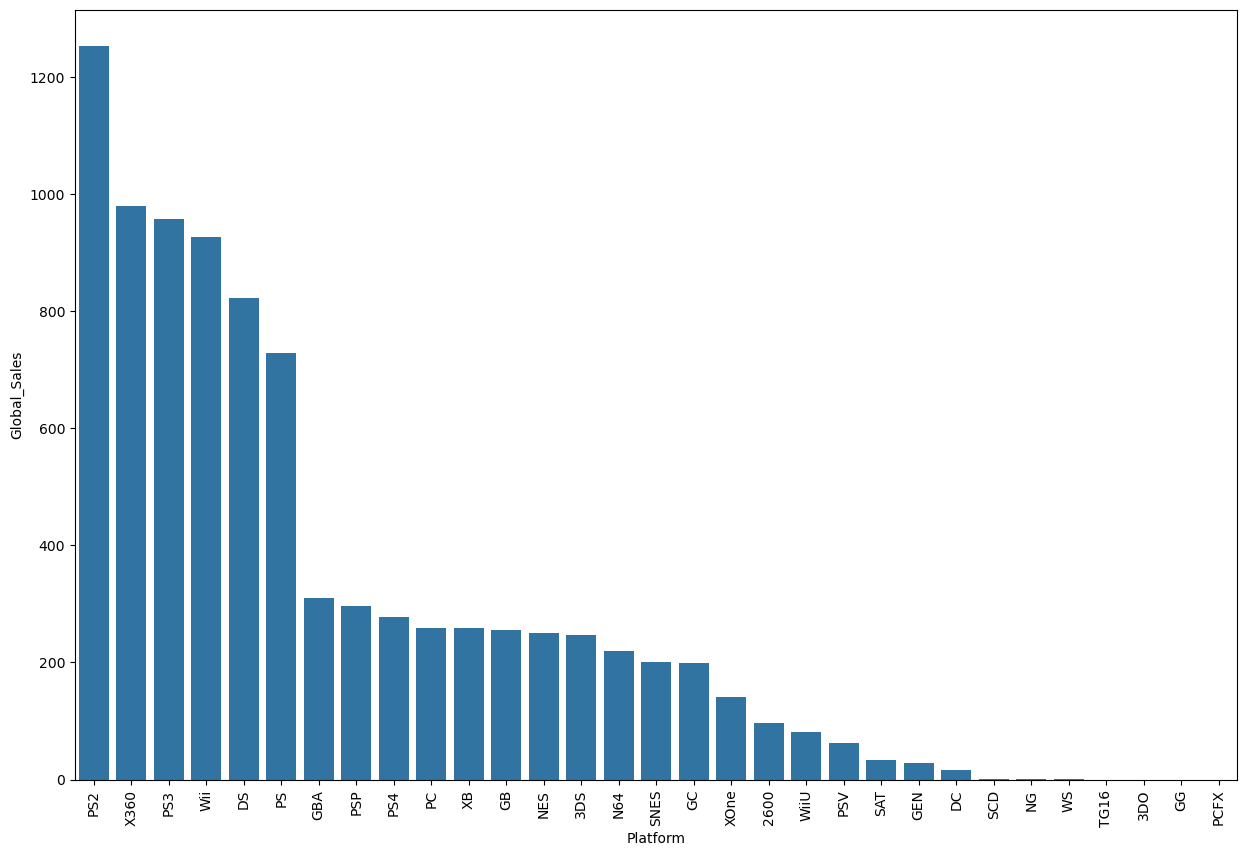

#### 13. Выведите топ 20 Publisher

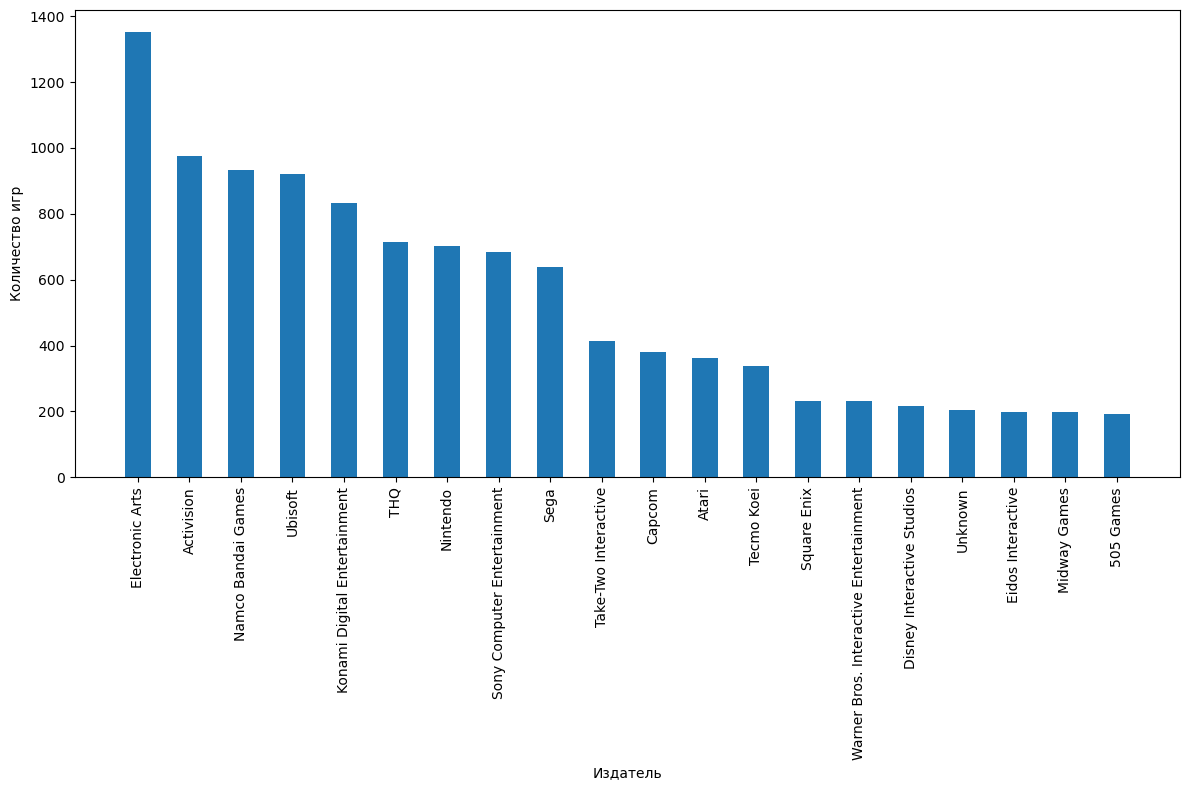

In [96]:
top_20_publishers = vgs['Publisher'].value_counts().head(20)
plt.figure(figsize=(12, 8))
plt.bar(top_20_publishers.index, top_20_publishers.values, align='center', width=0.5)
plt.xticks(rotation=90)
plt.ylabel('Количество игр')
plt.xlabel('Издатель')
plt.tight_layout()
plt.show()

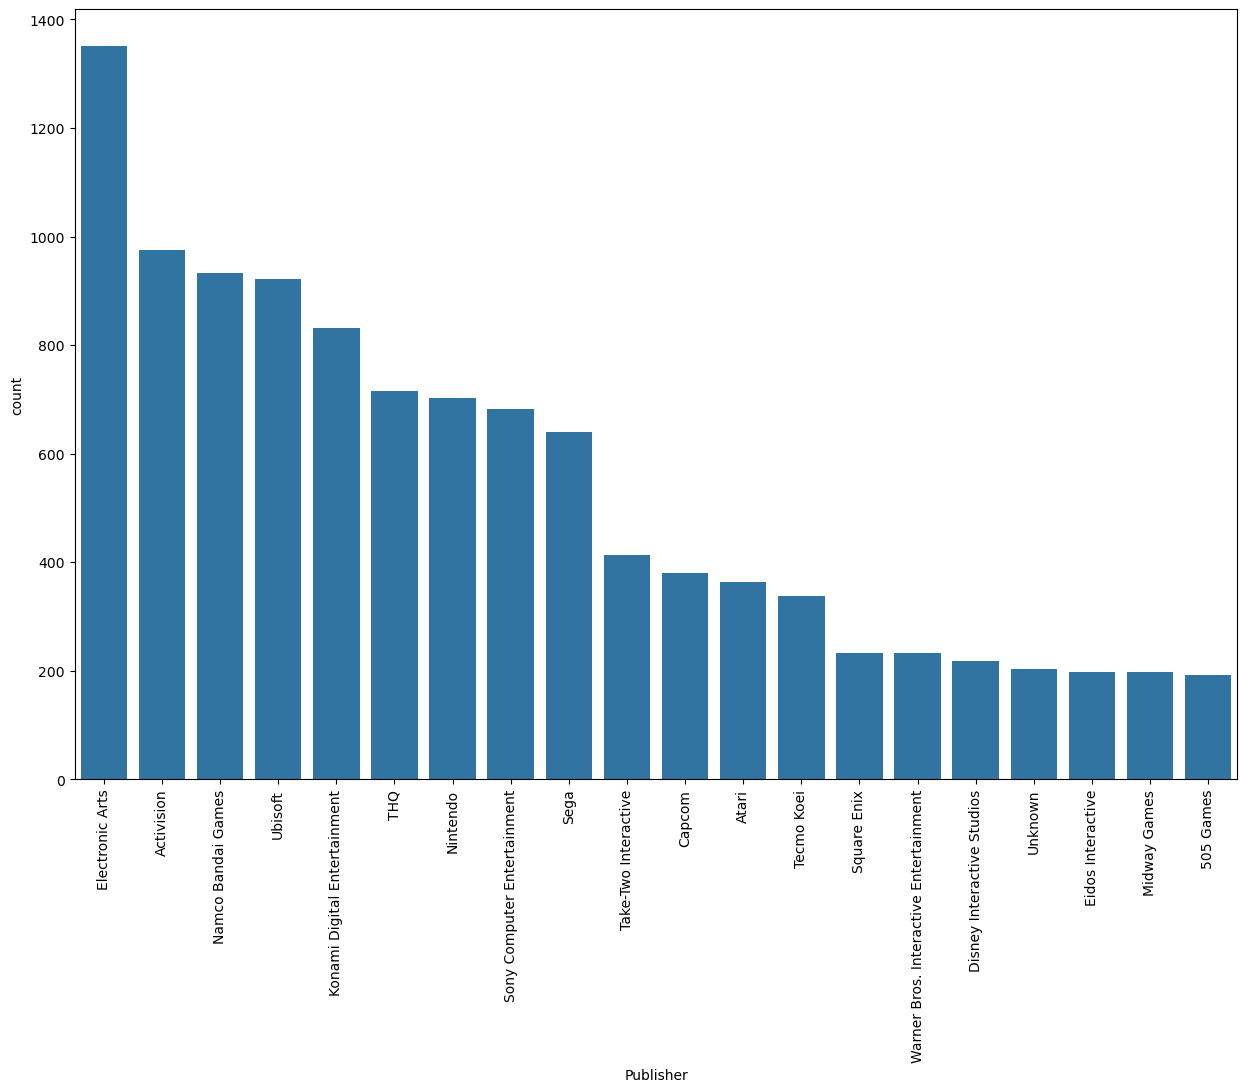

#### 14. Общий доход по регионам

In [119]:
vgs

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [97]:
vgs[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
vgs

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


,region,sale
0,NA_Sales,4384.41
1,EU_Sales,2429.45
2,JP_Sales,1290.09
3,Other_Sales,797.08


In [57]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_by_region = pd.DataFrame({'region': regions,'sale': [vgs[col].sum() for col in regions]})
sales_by_region

,region,sale
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


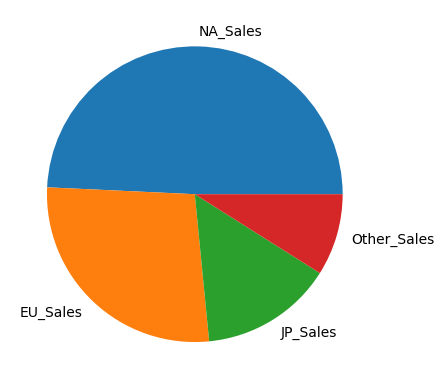

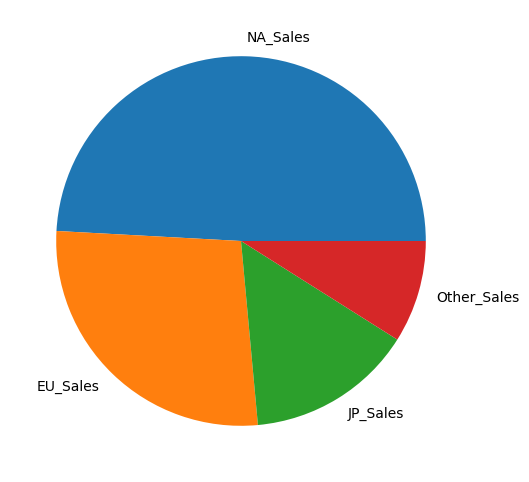

In [58]:
plt.figure(figsize=(8, 6))
plt.pie(sales_by_region['sale'], labels=sales_by_region['region'])
plt.show()

<Axes: xlabel='region', ylabel='sale'>

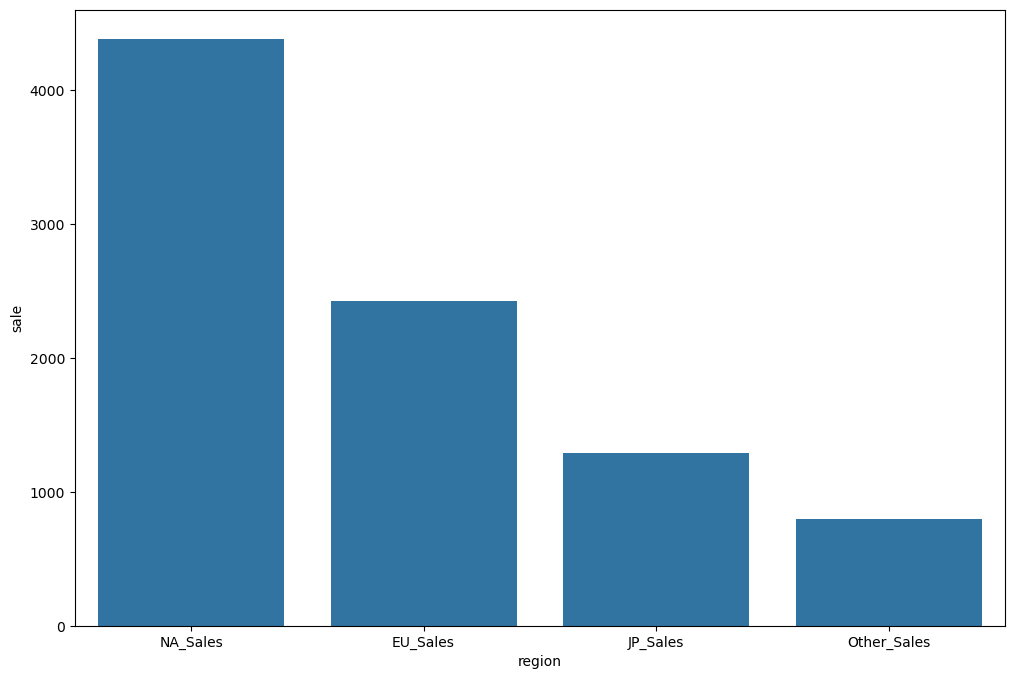

<Axes: >

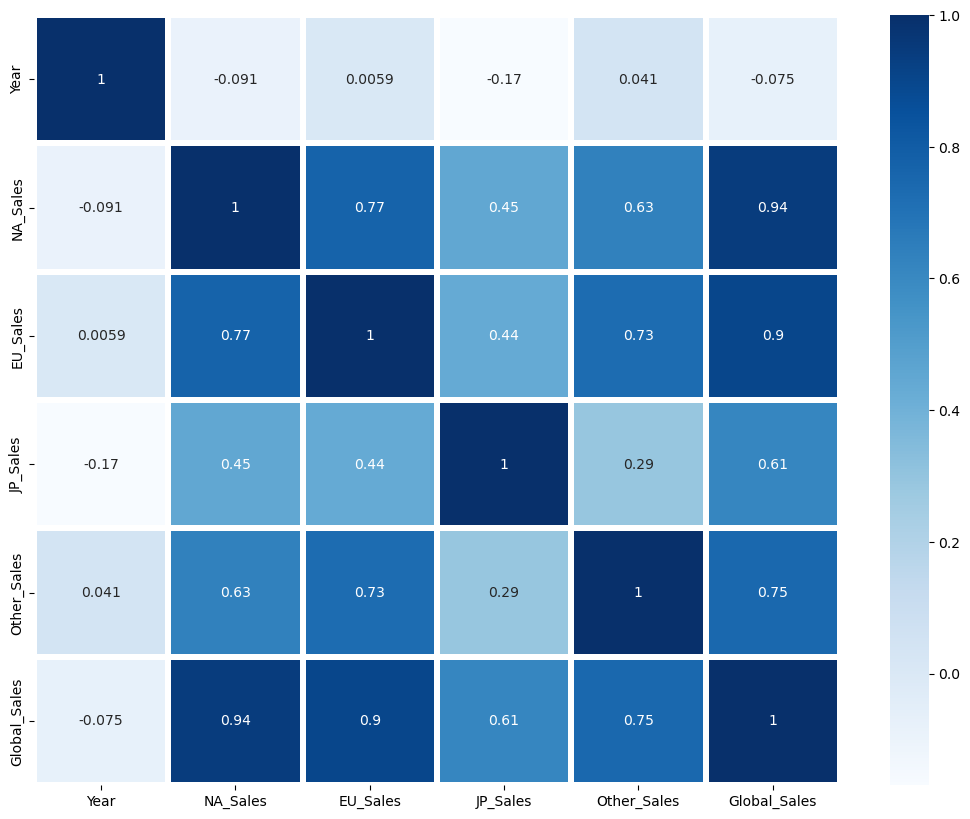

### 15.Pair plot

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002,GBA,Platform,0.01,0.00,0.00
16594,2003,GC,Shooter,0.01,0.00,0.00
16595,2008,PS2,Racing,0.00,0.00,0.00
16596,2010,DS,Puzzle,0.00,0.01,0.00


In [56]:
res = vgs[['Year', 'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'Other_Sales']]
res

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002,GBA,Platform,0.01,0.00,0.00
16594,2003,GC,Shooter,0.01,0.00,0.00
16595,2008,PS2,Racing,0.00,0.00,0.00
16596,2010,DS,Puzzle,0.00,0.01,0.00


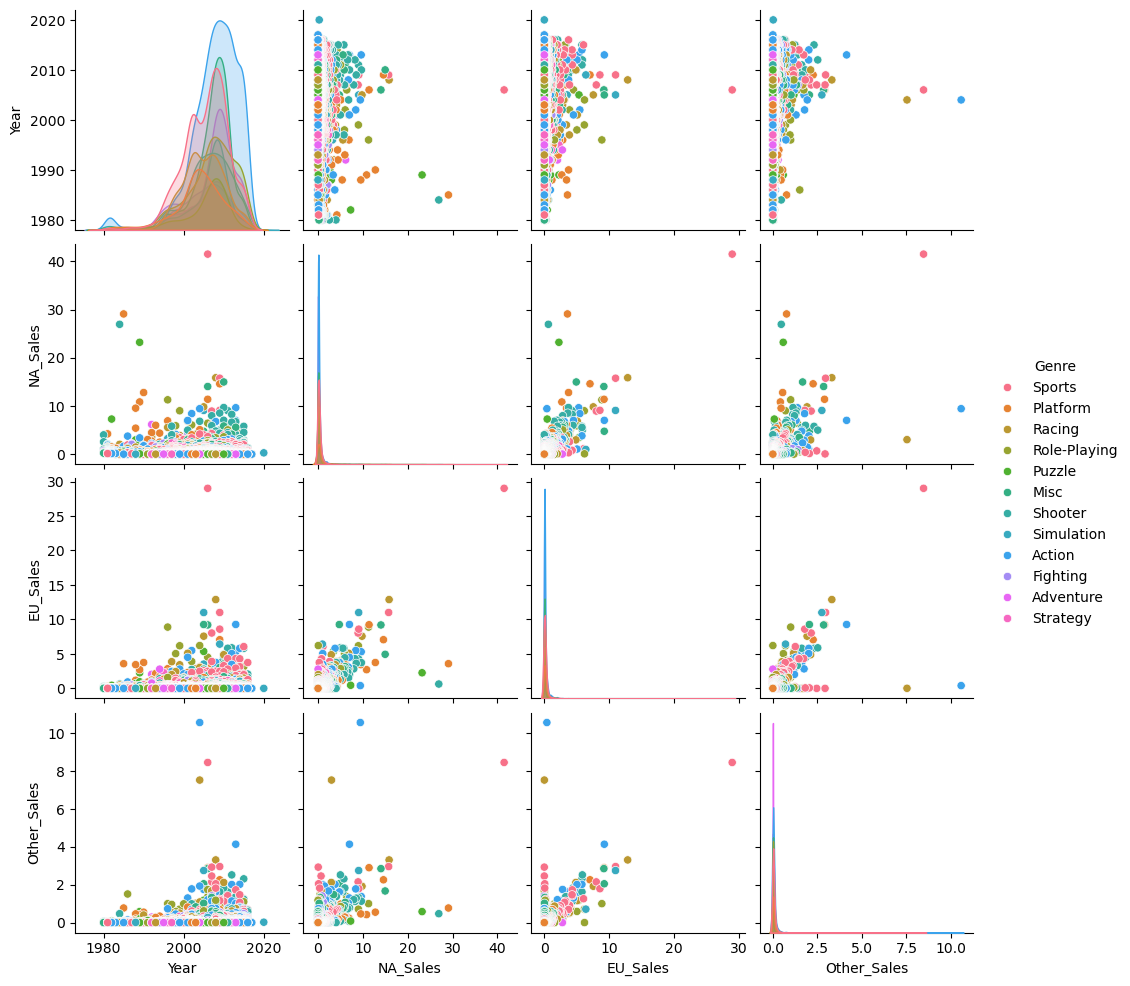

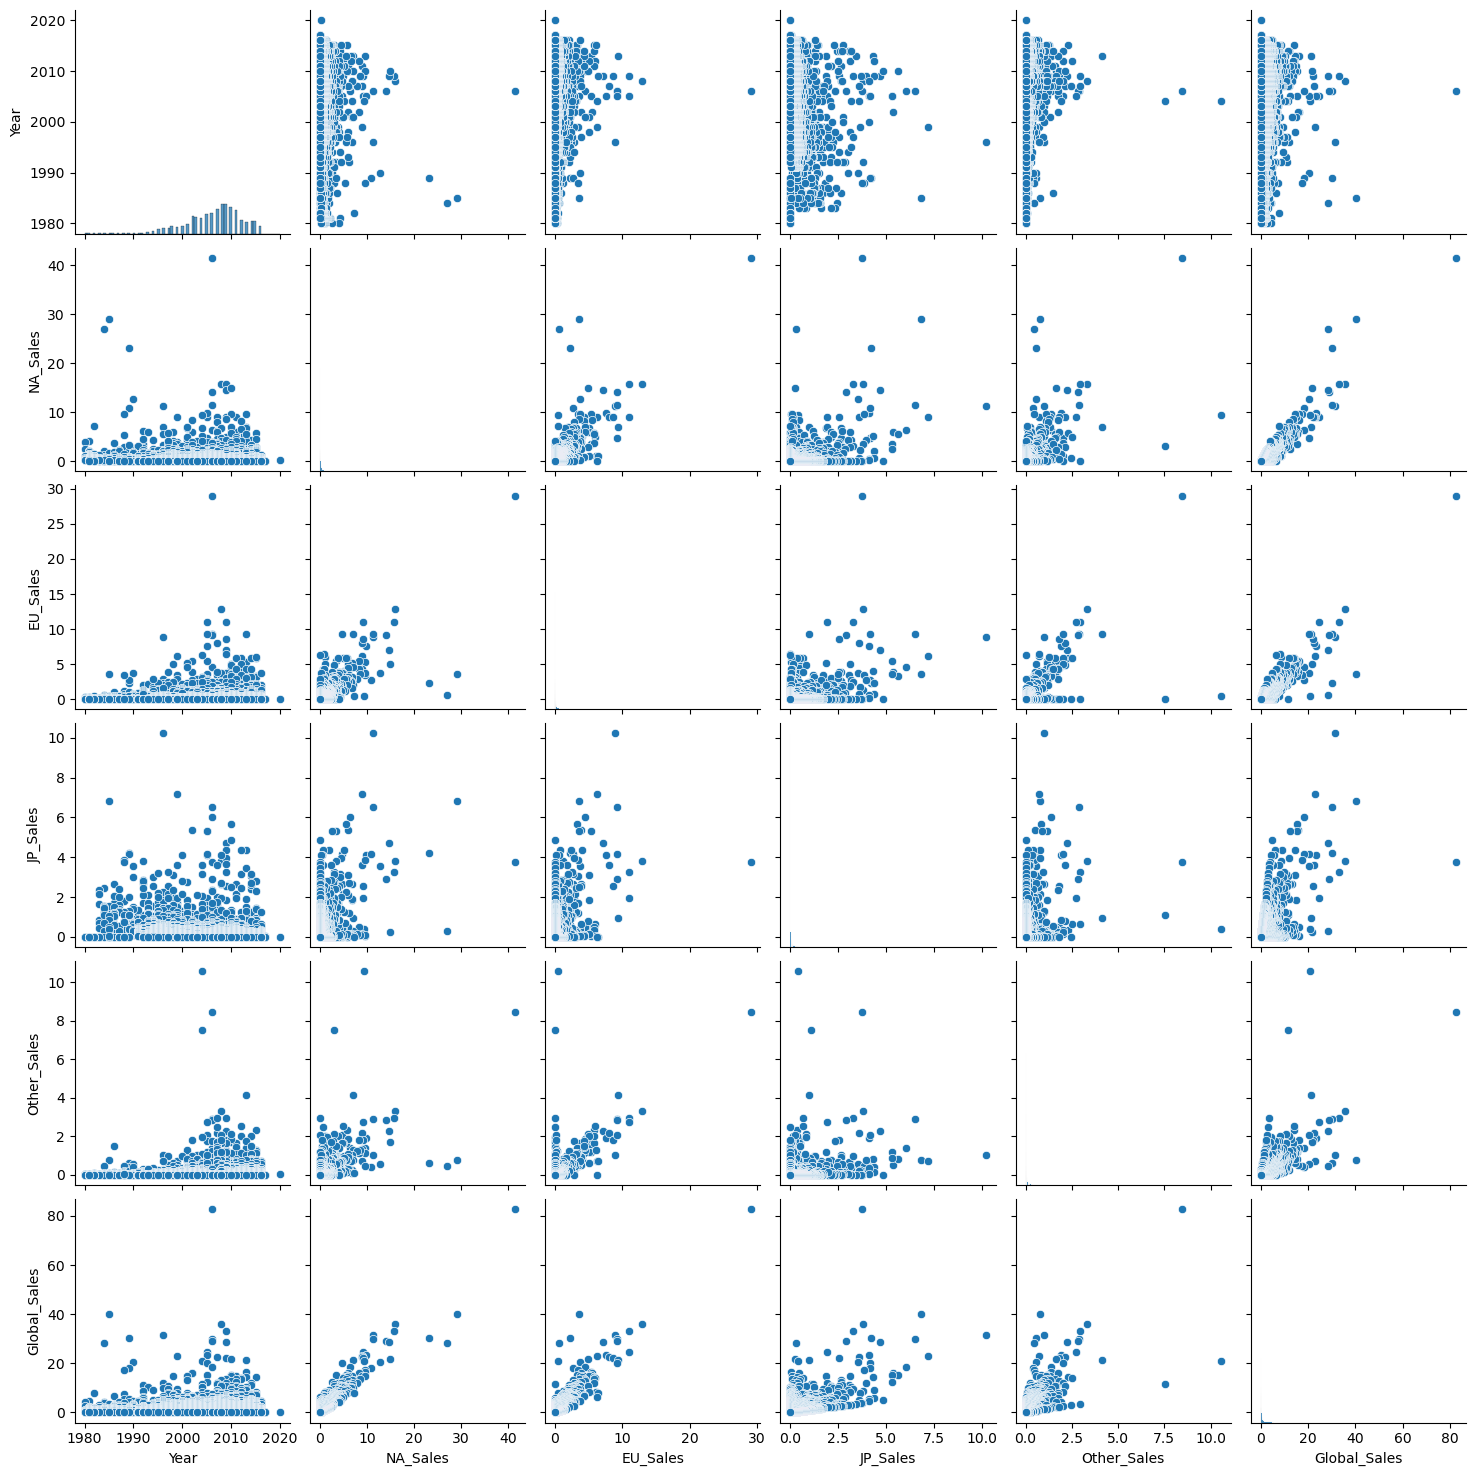

In [55]:
sns.pairplot(vgs[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].dropna())
plt.show()

#### 16. Выведите 3 самых распространенных жанра видеоигр в мире

Genre
Action    3309
Sports    2343
Misc      1712
Name: count, dtype: int64

In [101]:
vgs['Genre'].value_counts().head(3)


Genre
Action    3309
Sports    2343
Misc      1712
Name: count, dtype: int64

### 17. В названиях скольких видеоигр есть слово «super» ??

In [100]:
super_games = vgs[vgs['Name'].str.contains('Super', case=False, na=False)]
print(len(super_games))


383


287